# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_trial1_df=pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_trial1_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_count = len(mouse_trial1_df['Mouse ID'].unique())
print(f'The total number of unique Mouse IDs in this study is {mice_count}.')

The total number of unique Mouse IDs in this study is 249.


In [52]:
mice_count_1509 = len(mouse_trial1_df['Mouse ID'] == 'g1509')
print(f'The total number of unique Mouse IDs in this study is {mice_count_1509}.')

The total number of unique Mouse IDs in this study is 1893.


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_trial1_df.loc[mouse_trial1_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID's. 
g989_mask_s= mouse_trial1_df['Mouse ID']== 'g989'
mouse_trial1_df.loc[g989_mask_s]
bad_mice_mask_s = mouse_trial1_df['Mouse ID'].isin(duplicate_mice)
mouse_trial1_df.loc[bad_mice_mask_s]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_mouse_df = mouse_trial1_df.loc[~bad_mice_mask_s]
clean_mouse_df = mouse_trial1_df[mouse_trial1_df['Mouse ID'].isin(duplicate_mice) == False]
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_mouse_df['Mouse ID'].unique())
print(f'The total number of unique Mouse IDs in this study is {clean_mouse_count}.')

The total number of unique Mouse IDs in this study is 248.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_vol_mean=clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_vol_median=clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_variance=clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_stdev=clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_sem=clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
 
# Assemble the resulting series into a single summary DataFrame.
tumor_vol_stats_df = pd.DataFrame({'Mean Tumor Volume': tumor_vol_mean, 'Median Tumor Volume':tumor_vol_median, 'Tumor Volume Variance':tumor_vol_variance, 'Tumor Volume Std. Dev.':tumor_vol_stdev,'Tumor Volume Std. Err.':tumor_vol_sem })
tumor_vol_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_agg_stats =  clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

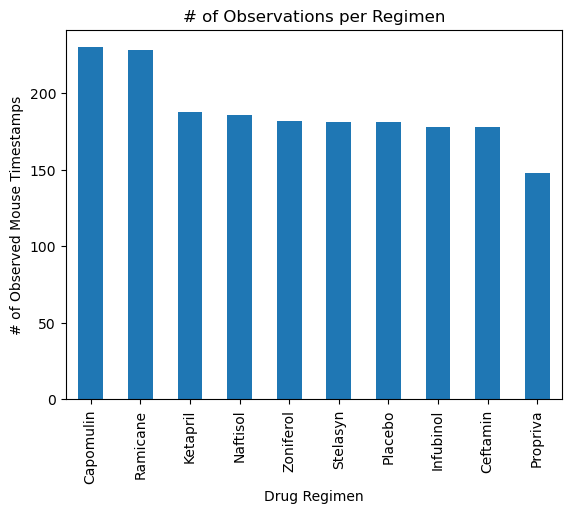

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_mouse_df["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color='tab:blue') 
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timestamps")
plt.title('# of Observations per Regimen')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

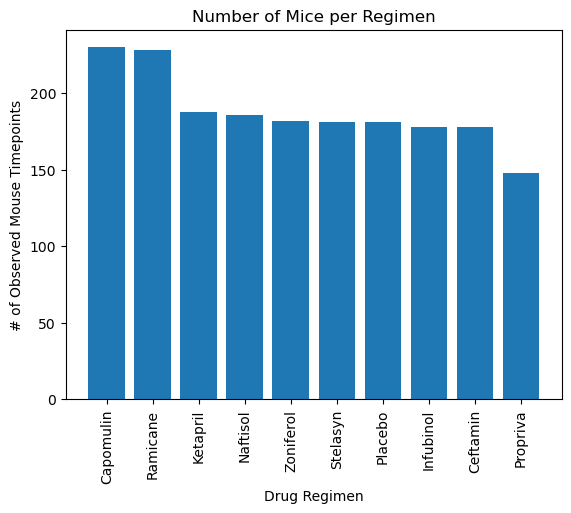

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Regimen")


x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='tab:blue', alpha=1, align='center')
plt.show


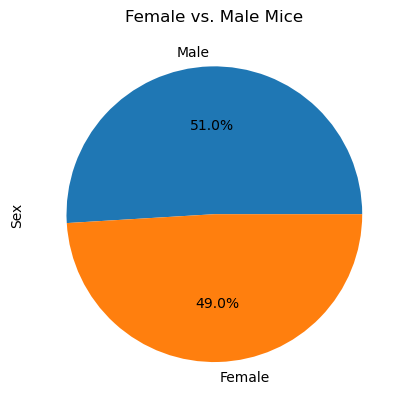

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mouse_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.ylabel('Sex')
plt.show()

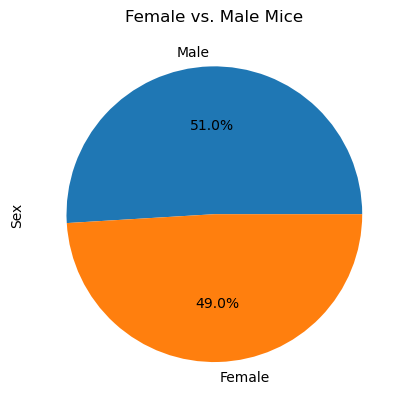

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots  
##Calculate the final tumor volume of each mouse across four of the treatment regimens

In [37]:
 
# Start by getting the last (greatest) timepoint for each mouse
high_time_df = pd.DataFrame(clean_mouse_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_mouse_df, high_time_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,45
1,f932,0,45.0,0,Ketapril,Male,15,29,0
2,g107,0,45.0,0,Ketapril,Female,2,29,35
3,a457,0,45.0,0,Ketapril,Female,11,30,10
4,c819,0,45.0,0,Ketapril,Male,21,25,40


In [14]:
# Put treatments into a list for for loop (and later for plot labels) Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# For each promising drug
    
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series

    
    # add the tumor volume series to the plotting list
    
    # Determine outliers for this drug using IQR, upper, and lower bounds for this drug
quartiles = values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'IQR for {drug}: {iqr}')

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


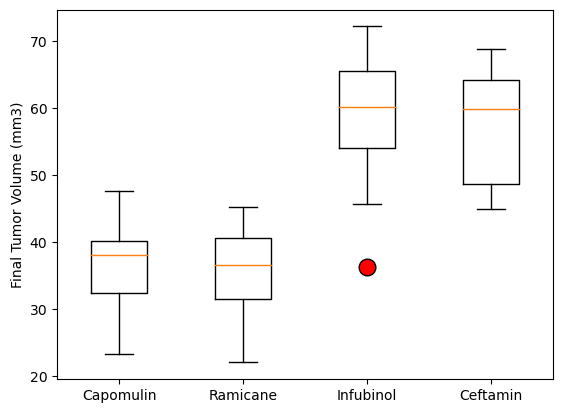

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

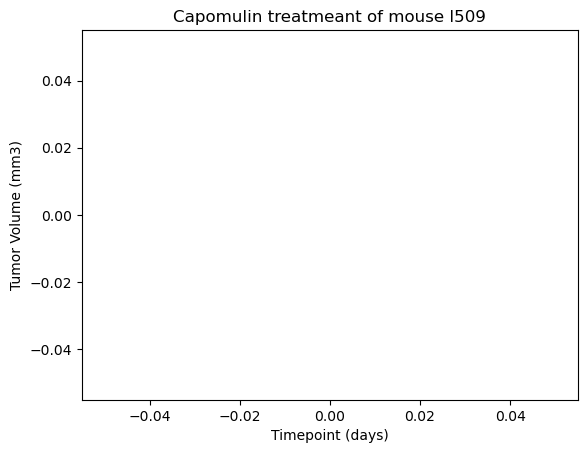

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
capomulin_data = capomulin_mouse.loc[capomulin_mouse["Mouse ID"]=="1509", :]
x_axis = capomulin_data["Timepoint"]
y_axis = capomulin_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


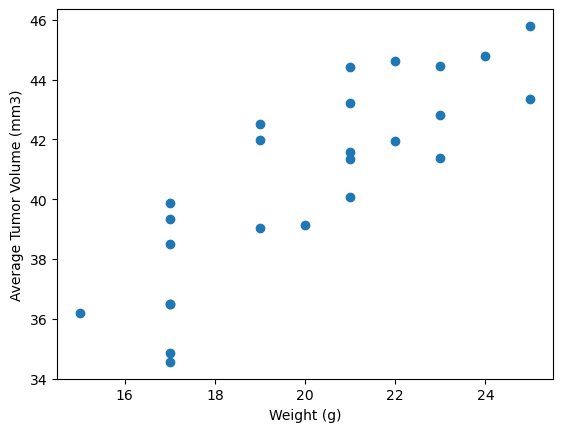

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


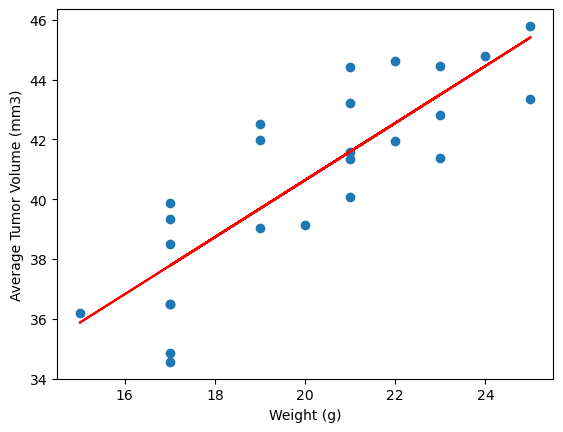

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
